In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim
# CODE FILES HERE
from main import Solver

%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [3]:
# 2 layer networks for encoder and decoder
mnist_dim = 784
hidden_units = 500 # Kingma, Welling use 500 neurons, otherwise use 400
z_dim = 2 # 20. 1000 is suggested in the paper "Tutorial on VAE" but Kingma, Welling show 20 is sufficient for MNIST
learning_rate = 1e-3
batch_size = 128
optimizer = torch.optim.Adam
epochs = 5 #0000
num_normal_plots = 2

In [4]:
solver = Solver(optimizer, mnist_dim, hidden_units, z_dim, epochs, num_normal_plots, batch_size, learning_rate)
solver.run()

+++++ START RUN +++++
====> Epoch: 1 train set loss avg: 187.3304
====> Test set loss avg: 182.8449
59.61868643760681 seconds for epoch 1
====> Epoch: 2 train set loss avg: 167.3961
====> Test set loss avg: 179.4848
58.796772718429565 seconds for epoch 2
====> Epoch: 3 train set loss avg: 163.3315
====> Test set loss avg: 177.9223
63.806605100631714 seconds for epoch 3
====> Epoch: 4 train set loss avg: 160.8710
====> Test set loss avg: 177.4501
57.928746938705444 seconds for epoch 4
====> Epoch: 5 train set loss avg: 159.1194
====> Test set loss avg: 178.2843
56.63955545425415 seconds for epoch 5
+++++ RUN IS FINISHED +++++


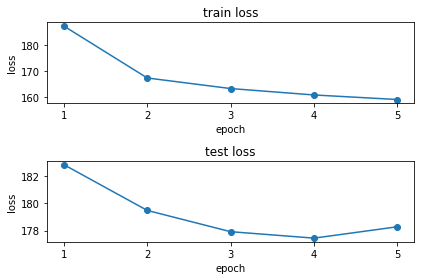

In [5]:
# Plotting train and test losses for all epochs
xaxis = np.arange(1, epochs+1)
train_losses = list(list(zip(*solver.train_loss_history))[1])
# Plotting the train loss
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, len(solver.train_loss_history)+1), train_losses, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train loss")
#plt.legend(['train loss'], loc='upper right')
plt.xticks(xaxis)

# Plotting the test loss
plt.subplot(2, 1, 2)
plt.plot(np.arange(1, len(solver.test_loss_history)+1), solver.test_loss_history, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("test loss")
#plt.legend(['test loss'], loc='upper right')
plt.xticks(xaxis)

plt.tight_layout()
plt.show()

epoch: 2, mean: -0.30696960114466865, std: 1.388121005060322, var: 1.9268799246896788
epoch: 4, mean: -0.24897261963152428, std: 1.3310764445933199, var: 1.7717645013511933


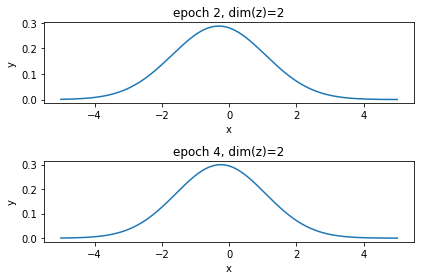

In [7]:
# Plotting histogram of the latent space, given the computed \mu and \sigma
x = np.linspace(-5, 5, 5000)
plot_cols = np.arange(1, num_normal_plots+1)
for idx, stats in enumerate(solver.z_stats):
    epoch, mu, std = stats
    print("epoch: {}, mean: {}, std: {}, var: {}".format(epoch, mu, std, np.power(std, 2)))
    y = (1 / (np.sqrt(2 * np.pi * np.power(std, 2)))) * \
        (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(std, 2)))))
    plt.subplot(2, 1, plot_cols[idx])
    plt.plot(x, y)
    plt.title("epoch {}, dim(z)={}".format(epoch, z_dim))
    plt.xlabel("x")
    plt.ylabel("y")

plt.tight_layout()
plt.show()

epoch: 1, recon. loss: 181.9744110107422, KL div.: 5.355999946594238
epoch: 2, recon. loss: 162.303466796875, KL div.: 5.092658042907715
epoch: 3, recon. loss: 158.0763702392578, KL div.: 5.2551493644714355
epoch: 4, recon. loss: 155.47613525390625, KL div.: 5.394896507263184
epoch: 5, recon. loss: 153.6256561279297, KL div.: 5.493873119354248


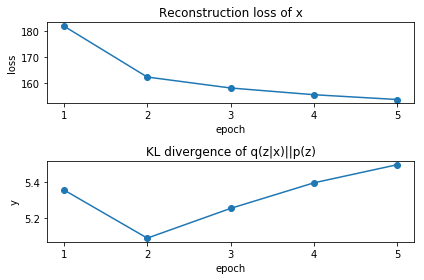

In [9]:
# Monitoring the reconstruction loss and KL divergence
rls = list(list(zip(*solver.train_loss_history))[2])
kls = list(list(zip(*solver.train_loss_history))[3])
for epoch, _, rl, kl in solver.train_loss_history:
    print("epoch: {}, recon. loss: {}, KL div.: {}".format(epoch, rl, kl))

plt.subplot(2, 1, 1)
plt.plot(np.arange(1, len(rls)+1), rls, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Reconstruction loss of x")
#plt.legend(['recon. loss'], loc='upper right')
plt.xticks(xaxis)

plt.subplot(2, 1, 2)
plt.plot(np.arange(1, len(kls)+1), kls, '-o')
plt.xlabel("epoch")
plt.ylabel("y")
plt.title("KL divergence of q(z|x)||p(z)")
#plt.legend(['KL div.'], loc='upper right')
plt.xticks(xaxis)

plt.tight_layout()
plt.show()

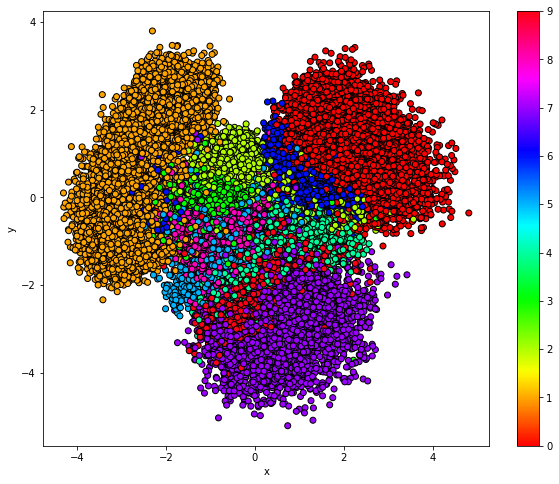

In [10]:
# visualize q(z|x) like in https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/
if solver.z_dim == 2:
    labels = solver.labels.tolist()
    plt.figure(figsize=(10,8))
    plt.scatter(solver.latent_space[:,0], solver.latent_space[:,1], c=labels, edgecolors='black', cmap='hsv')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar() # show color scale
else:
    print("Plot of latent space not possible as dimension of z is not 2")

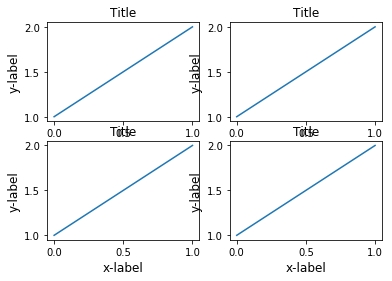

In [64]:
# JUST TEST 

plt.rcParams['savefig.facecolor'] = "0.8"

def example_plot(ax, fontsize=12):
     ax.plot([1, 2])
     ax.locator_params(nbins=3)
     ax.set_xlabel('x-label', fontsize=fontsize)
     ax.set_ylabel('y-label', fontsize=fontsize)
     ax.set_title('Title', fontsize=fontsize)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()
plt.show()